# Housing Prices Analysis

### EDA

In [796]:
import pandas as pd

# load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [797]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [798]:
# duplicated rows
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


In [799]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [800]:
# check missing values
missing_values = train_df.isnull().sum()
missing_values[missing_values > 0]


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [801]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


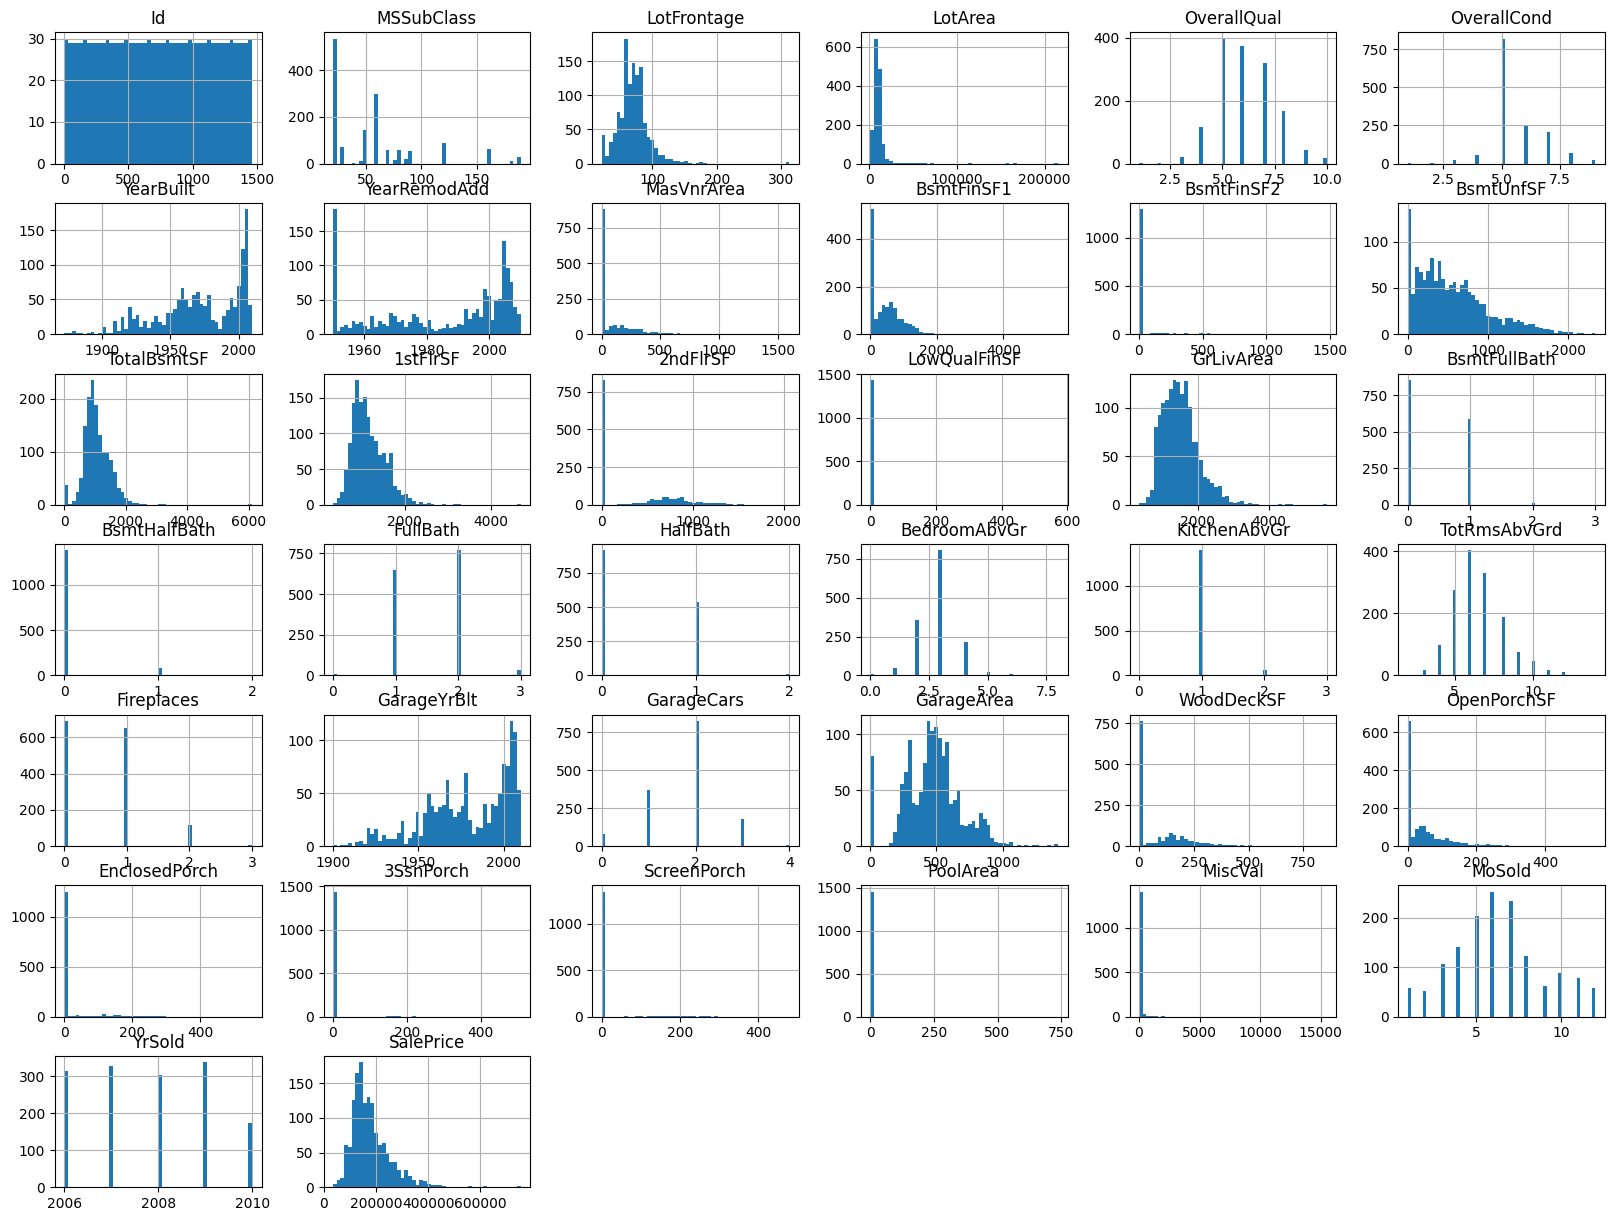

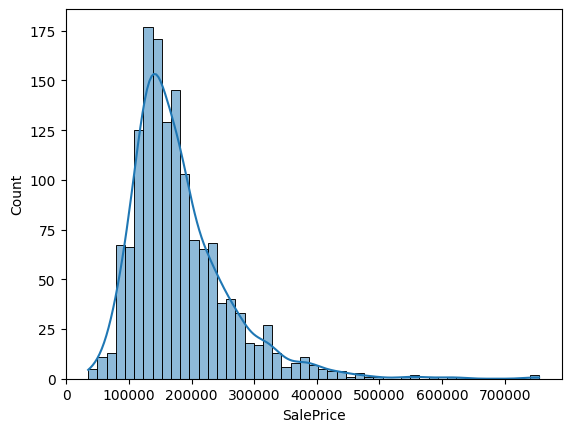

In [802]:
import matplotlib.pyplot as plt
import seaborn as sns

train_df.hist(bins=50, figsize=(20, 15))
plt.show()

sns.histplot(train_df['SalePrice'], kde=True)
plt.show()


### Data Preprocessing

There're so many columns without values. Consider handling each of them properly.

In [803]:
def handle_missing_values(df):
    # Features where NA means that the feature doesn't exist for that property
    na_means_no_feature = [
        "Alley",
        "BsmtQual",
        "BsmtCond",
        "BsmtExposure",
        "BsmtFinType1",
        "BsmtFinType2",
        "FireplaceQu",
        "GarageType",
        "GarageFinish",
        "GarageQual",
        "GarageCond",
        "PoolQC",
        "Fence",
        "MiscFeature",
        "MasVnrType",
    ]

    # Fill with "None"
    for feature in na_means_no_feature:
        if feature in df.columns:
            df[feature] = df[feature].fillna("None")

    # Fill with mean
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())

    features_filledna_with_mode = [
        "Electrical",
        "MSZoning",
        "Utilities",
        "Exterior1st",
        "Exterior2nd",
        "KitchenQual",
        "Functional",
        "SaleType",
    ]
    # Fill with mode
    for feature in features_filledna_with_mode:
        if feature in df.columns:
            df[feature] = df[feature].fillna(df[feature].mode()[0])

    # For features like GarageYrBlt where NA means no garage
    df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)

    # For other numerical features, consider the context
    # Some might benefit from mean, others from median or mode imputation
    numerical_features_to_impute = [
        "MasVnrArea",
        "BsmtFinSF1",
        "BsmtFinSF2",
        "BsmtUnfSF",
        "TotalBsmtSF",
        "BsmtFullBath",
        "BsmtHalfBath",
        "GarageCars",
        "GarageArea",
    ]

    for feature in numerical_features_to_impute:
        if feature in df.columns:
            # Check if feature has missing values
            if df[feature].isnull().sum() > 0:
                # Check if it's related to basement or garage (might want to fill with 0)
                if "Bsmt" in feature or "Garage" in feature:
                    df[feature] = df[feature].fillna(0)
                else:
                    df[feature] = df[feature].fillna(df[feature].median())

In [804]:
handle_missing_values(train_df)

missing_values = train_df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

In [805]:
handle_missing_values(test_df)

missing_values = test_df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

In [806]:
# Identify which columns are categorical and should be encoded
train_df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [807]:
from sklearn.preprocessing import LabelEncoder

def apply_label_encoding(df):
    # columns for label encoding
    label_columns = [
        "ExterQual",
        "ExterCond",
        "BsmtQual",
        "BsmtCond",
        "HeatingQC",
        "KitchenQual",
        "FireplaceQu",
        "GarageQual",
        "GarageCond",
        "PoolQC",
    ]

    label_encoder = LabelEncoder()

    for col in label_columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))
    return df

In [808]:
train_df = apply_label_encoding(train_df)
test_df = apply_label_encoding(test_df)

In [809]:
def apply_one_hot_encoding(df):
    print(train_df.columns)
    # columns for one hot encoding
    one_hot_columns = [
        "MSZoning",
        "Street",
        "Alley",
        "LotShape",
        "LandContour",
        "Utilities",
        "LotConfig",
        "LandSlope",
        "Neighborhood",
        "Condition1",
        "Condition2",
        "BldgType",
        "HouseStyle",
        "RoofStyle",
        "RoofMatl",
        "Exterior1st",
        "Exterior2nd",
        "MasVnrType",
        "Foundation",
        "BsmtExposure",
        "BsmtFinType1",
        "BsmtFinType2",
        "Heating",
        "CentralAir",
        "Electrical",
        "Functional",
        "GarageType",
        "GarageFinish",
        "PavedDrive",
        "Fence",
        "MiscFeature",
        "SaleType",
        "SaleCondition",
    ]

    df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)
    return df

In [810]:
train_df = apply_one_hot_encoding(train_df)
test_df = apply_one_hot_encoding(test_df)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [811]:
print(train_df.dtypes)

Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
                          ...   
SaleCondition_AdjLand       bool
SaleCondition_Alloca        bool
SaleCondition_Family        bool
SaleCondition_Normal        bool
SaleCondition_Partial       bool
Length: 231, dtype: object


### Feature Scaling

In [812]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

# split dataset 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [813]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# apply scaling for only numeric
numeric_columns = X_train.select_dtypes(include=["float64", "int64"]).columns

X_train_id = X_train["Id"]
X_test_id = X_test["Id"]
test_df_id = test_df["Id"]

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
test_df[numeric_columns] = scaler.transform(test_df[numeric_columns])

X_train["Id"] = X_train_id
X_test["Id"]=X_test_id
test_df["Id"]=test_df_id

### Model Building

In [814]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR

lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
ridge_model = Ridge(alpha=1.0)
svm_model = SVR()

models = {
    "Linear Regression": lr_model,
    "Random Forest": rf_model,
    "Ridge": ridge_model,
    "SVM": svm_model,
}

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

for k, v in models.items():
    v.fit(X_train.drop(columns=["Id"]), y_train)
    y_pred = v.predict(X_test.drop(columns=["Id"]))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"---{k}---")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R²: {r2}")

---Linear Regression---
RMSE: 51201.76162018778
MAE: 21448.026329568747
R²: 0.6582126597752693
---Random Forest---
RMSE: 29323.490297997112
MAE: 17737.885616438354
R²: 0.8878969342332492
---Ridge---
RMSE: 31341.179931632498
MAE: 20007.568185967684
R²: 0.8719390110701455
---SVM---
RMSE: 88666.71067306369
MAE: 59566.706593440984
R²: -0.02496104718652825


Since Random Forest shows the best performance, with the highest predictive accuracy and explanatory power, try to improve its performance by adjusting the hyperparameters.

In [815]:
from sklearn.model_selection import GridSearchCV

rf_improved = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
}

grid_search = GridSearchCV(
    estimator=rf_improved, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2
)
grid_search.fit(X_train.drop(columns=["Id"]), y_train)

print("Best parameters found: ", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test.drop(columns=["Id"]))

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

/Users/suguruohashi/git/ds-0924/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END max_depth=Non

/Users/suguruohashi/git/ds-0924/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
900 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
558 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/suguruohashi/git/ds-0924/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/suguruohashi/git/ds-0924/venv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/suguruohashi/git/ds-0924/venv/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validat

Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


In [816]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 32466.015442926557
MAE: 17923.237706609794
R²: 0.8625818341659701


Adjusting the hyper parameters didn`t improve the performance. Now should focus on feature engineering.

Remove features which is less important

In [817]:
rf_fi = RandomForestRegressor(n_estimators=100, random_state=42)
rf_fi.fit(X_train, y_train)

feature_importances = rf_fi.feature_importances_

importance_df = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": feature_importances}
)
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Define threshold for removing features
threshold = 0.002
important_features = importance_df[importance_df["Importance"] > threshold]["Feature"]

X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

rf_fi.fit(X_train_important.drop(columns=["Id"]), y_train)

y_pred = rf_fi.predict(X_test_important.drop(columns=["Id"]))

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

RMSE: 28521.157600575872
MAE: 17517.23189497717
R²: 0.8939476094100568


In [819]:
train_columns = X_train_important.columns
test_columns = test_df.columns

test_df = test_df[train_columns]

# train_df, test_df = train_df.align(test_df, join='left', axis=1)
test_df_aligned = test_df.fillna(0)

y_pred = rf_fi.predict(test_df.drop(columns=["Id"]))

results = pd.DataFrame({"Id": test_df["Id"], "SalePrice": y_pred})
results.to_csv("predictions.csv", index=False)

print("Predictions saved as 'predictions.csv'.")

Predictions saved as 'predictions.csv'.
